In [1]:
import glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from datetime import datetime, timedelta

plt.rcParams.update({'font.size': 15})

In [2]:
SITE = 'MQT'

pip_path = '../data/PIP/2019_' + SITE + '/netCDF/'
mrr_path = '../data/MRR/'
met_path = '../data/MET/'

NANO_FACTOR = 1000000000


In [3]:
# Create script to loop through dir and plot when we have data from all variables

ds_met = xr.open_dataset(met_path + '2013-2020_' + SITE + '.nc')
times = np.asarray((ds_met['UTC Time'].values / NANO_FACTOR), dtype=int)
utc_time = pd.to_datetime(times, unit='s', origin='unix')
ds_met = ds_met.assign_coords(time = utc_time)

mrr_dates = []
for file in list(glob.glob(mrr_path + '*.nc')):                                       
    mrr_dates.append(file[-16:-8])
    
pip_dates = []
for file in list(glob.glob(pip_path + '/edensity_distributions/*.nc')):
    pip_dates.append(file[-37:-29])

mrr_ds_dates = []
for date in mrr_dates:
    year = int(date[:4])
    month = int(date[4:6])
    day = int(date[-2:])
    ds = ds_met.sel(time=(ds_met['time.year']==year) & (ds_met['time.month']==month) & (ds_met['time.day']==day))
    
    if len(ds.time.values) > 0:
        mrr_ds_dates.append(date)
        
met_dates = []
base_date = datetime.strptime('20190101', '%Y%m%d')
for i in range(365):
    new_date = base_date + timedelta(days=i)
    year = new_date.year
    month = new_date.month
    day = new_date.day
    ds = ds_met.sel(time=(ds_met['time.year']==year) & (ds_met['time.month']==month) & (ds_met['time.day']==day))
    
    if len(ds.time.values) > 0:
        met_dates.append(str(year) + str(month) + str(day))

matched_dates = []
for date in mrr_ds_dates:
    files = glob.glob(pip_path + '/*/*' + date + '*.nc')
    if len(files) == 4:
        matched_dates.append(date)
        
print("MRR:", len(mrr_dates), "MET:", len(met_dates), "PIP:", len(pip_dates))
print("Matched:", len(matched_dates))
print(matched_dates)


MRR: 351 MET: 341 PIP: 312
Matched: 261
['20191125', '20190621', '20190926', '20190525', '20190813', '20190803', '20190123', '20190410', '20191010', '20190714', '20190909', '20190919', '20191228', '20190722', '20190201', '20190426', '20190628', '20190115', '20190105', '20190825', '20190503', '20191009', '20190513', '20191019', '20191217', '20191207', '20190910', '20190617', '20191113', '20190409', '20191103', '20190723', '20191229', '20190114', '20190629', '20190901', '20190911', '20191008', '20190502', '20191206', '20191216', '20190606', '20191102', '20190408', '20191112', '20190418', '20190630', '20190620', '20191220', '20190524', '20190927', '20190122', '20190411', '20190401', '20190802', '20190812', '20190918', '20190908', '20191001', '20191011', '20190715', '20190826', '20190116', '20190106', '20190425', '20191025', '20190721', '20190327', '20190604', '20190614', '20190129', '20190819', '20190913', '20190903', '20191214', '20191204', '20190510', '20190728', '20190925', '20190622',

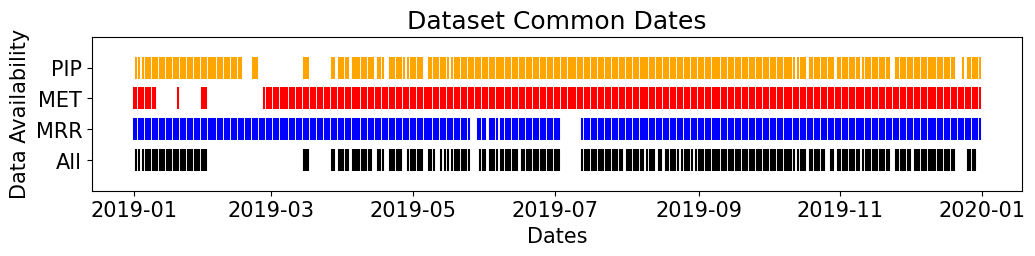

In [4]:

m_dates = pd.to_datetime(matched_dates, format='%Y%m%d')
mrr_dates = pd.to_datetime(mrr_dates, format='%Y%m%d')
met_dates = pd.to_datetime(met_dates, format='%Y%m%d')
pip_dates = pd.to_datetime(pip_dates, format='%Y%m%d')

m_date_data = np.full(len(matched_dates), 0)
mrr_date_data = np.full(len(mrr_dates), 1)
met_date_data = np.full(len(met_dates), 2)
pip_date_data = np.full(len(pip_dates), 3)

fig, ax = plt.subplots(figsize=(12, 2))
plt.scatter(m_dates, m_date_data, marker='|', s=250, color='black')
plt.scatter(mrr_dates, mrr_date_data, marker='|', s=250, color='blue')
plt.scatter(met_dates, met_date_data, marker='|', s=250, color='red')
plt.scatter(pip_dates, pip_date_data, marker='|', s=250, color='orange')
plt.xlabel('Dates')
plt.ylabel('Data Availability')
ax.set_ylim((-1, 4))
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['All', 'MRR', 'MET', 'PIP'])
plt.title('Dataset Common Dates')
plt.show()

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

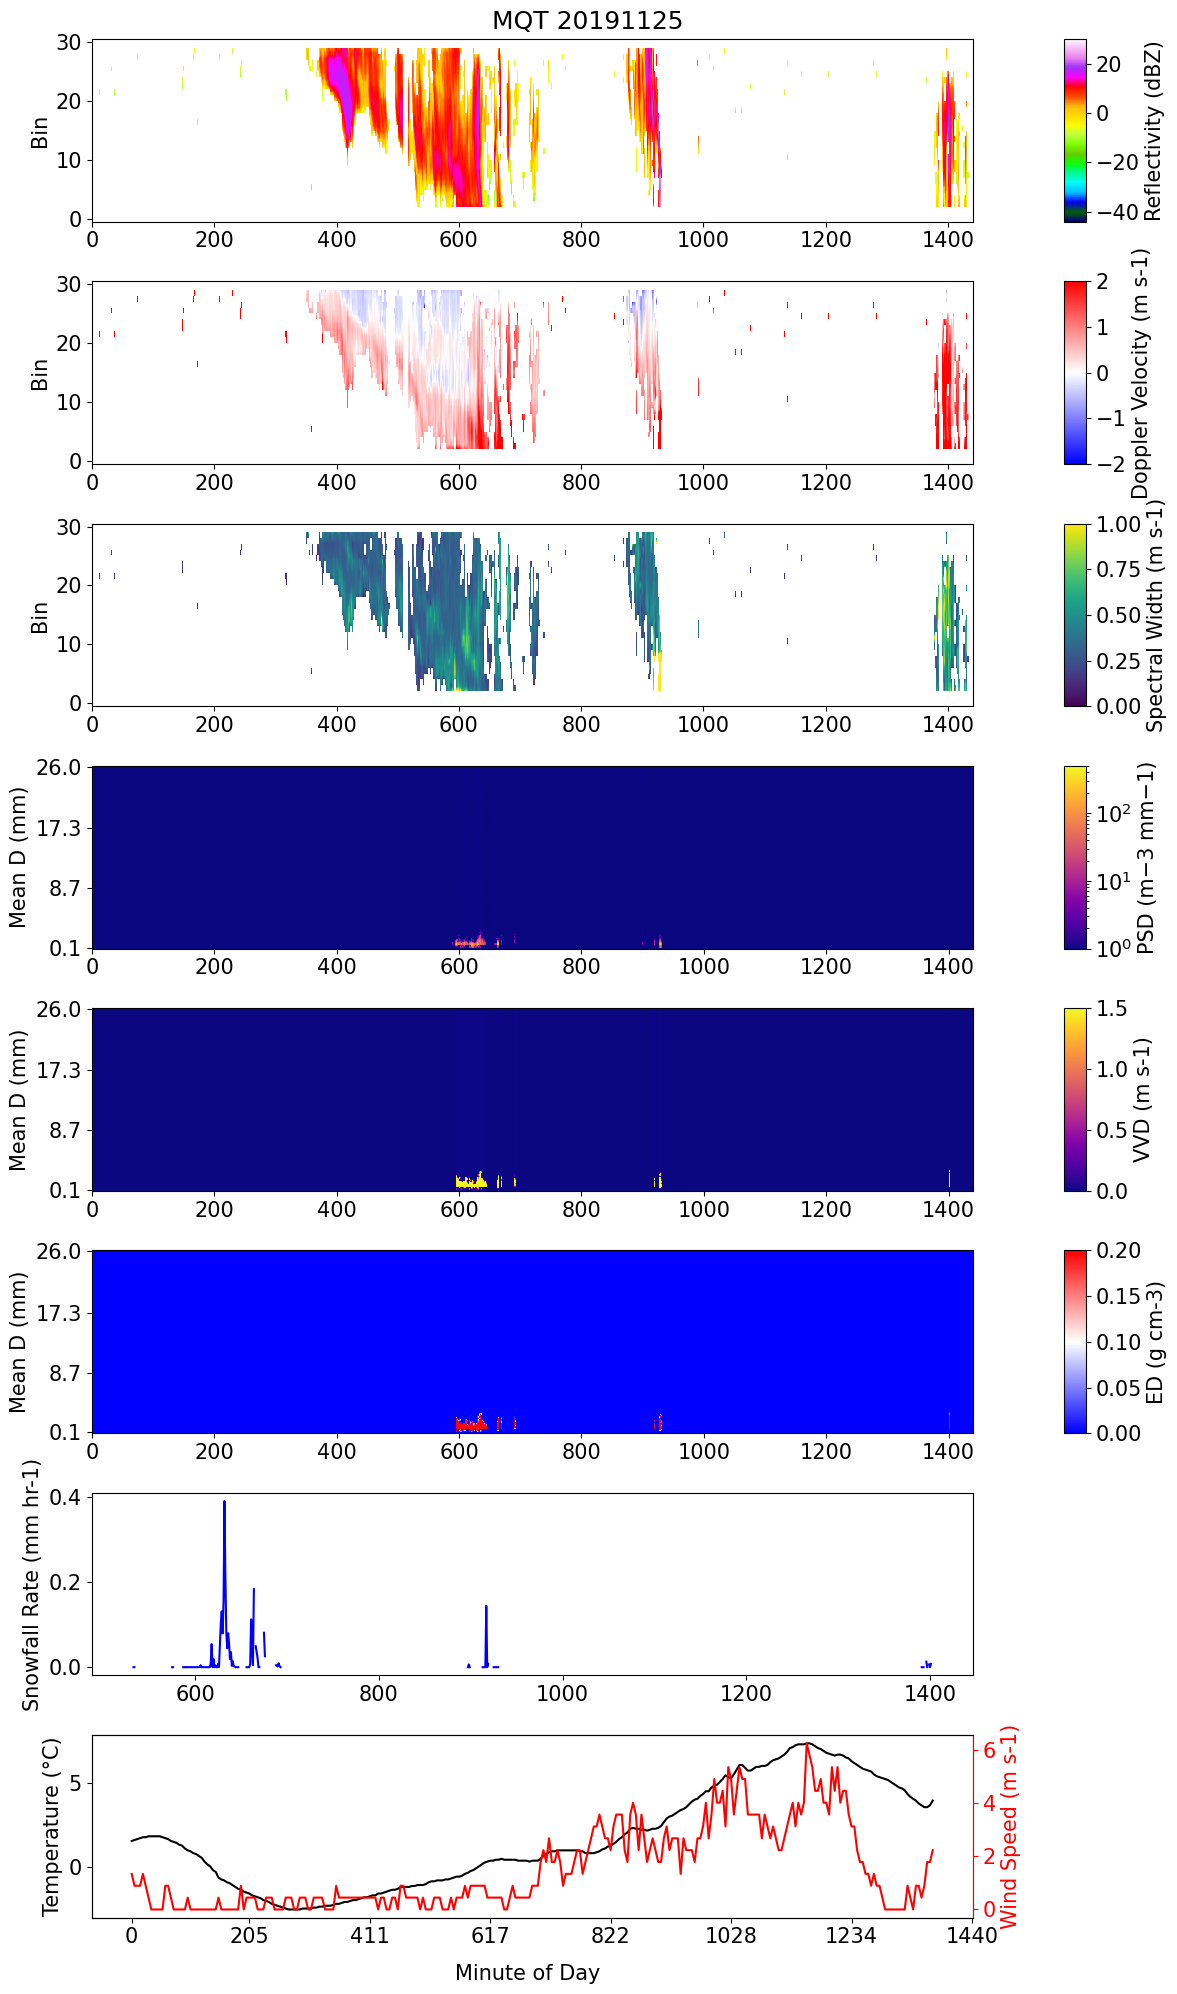

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

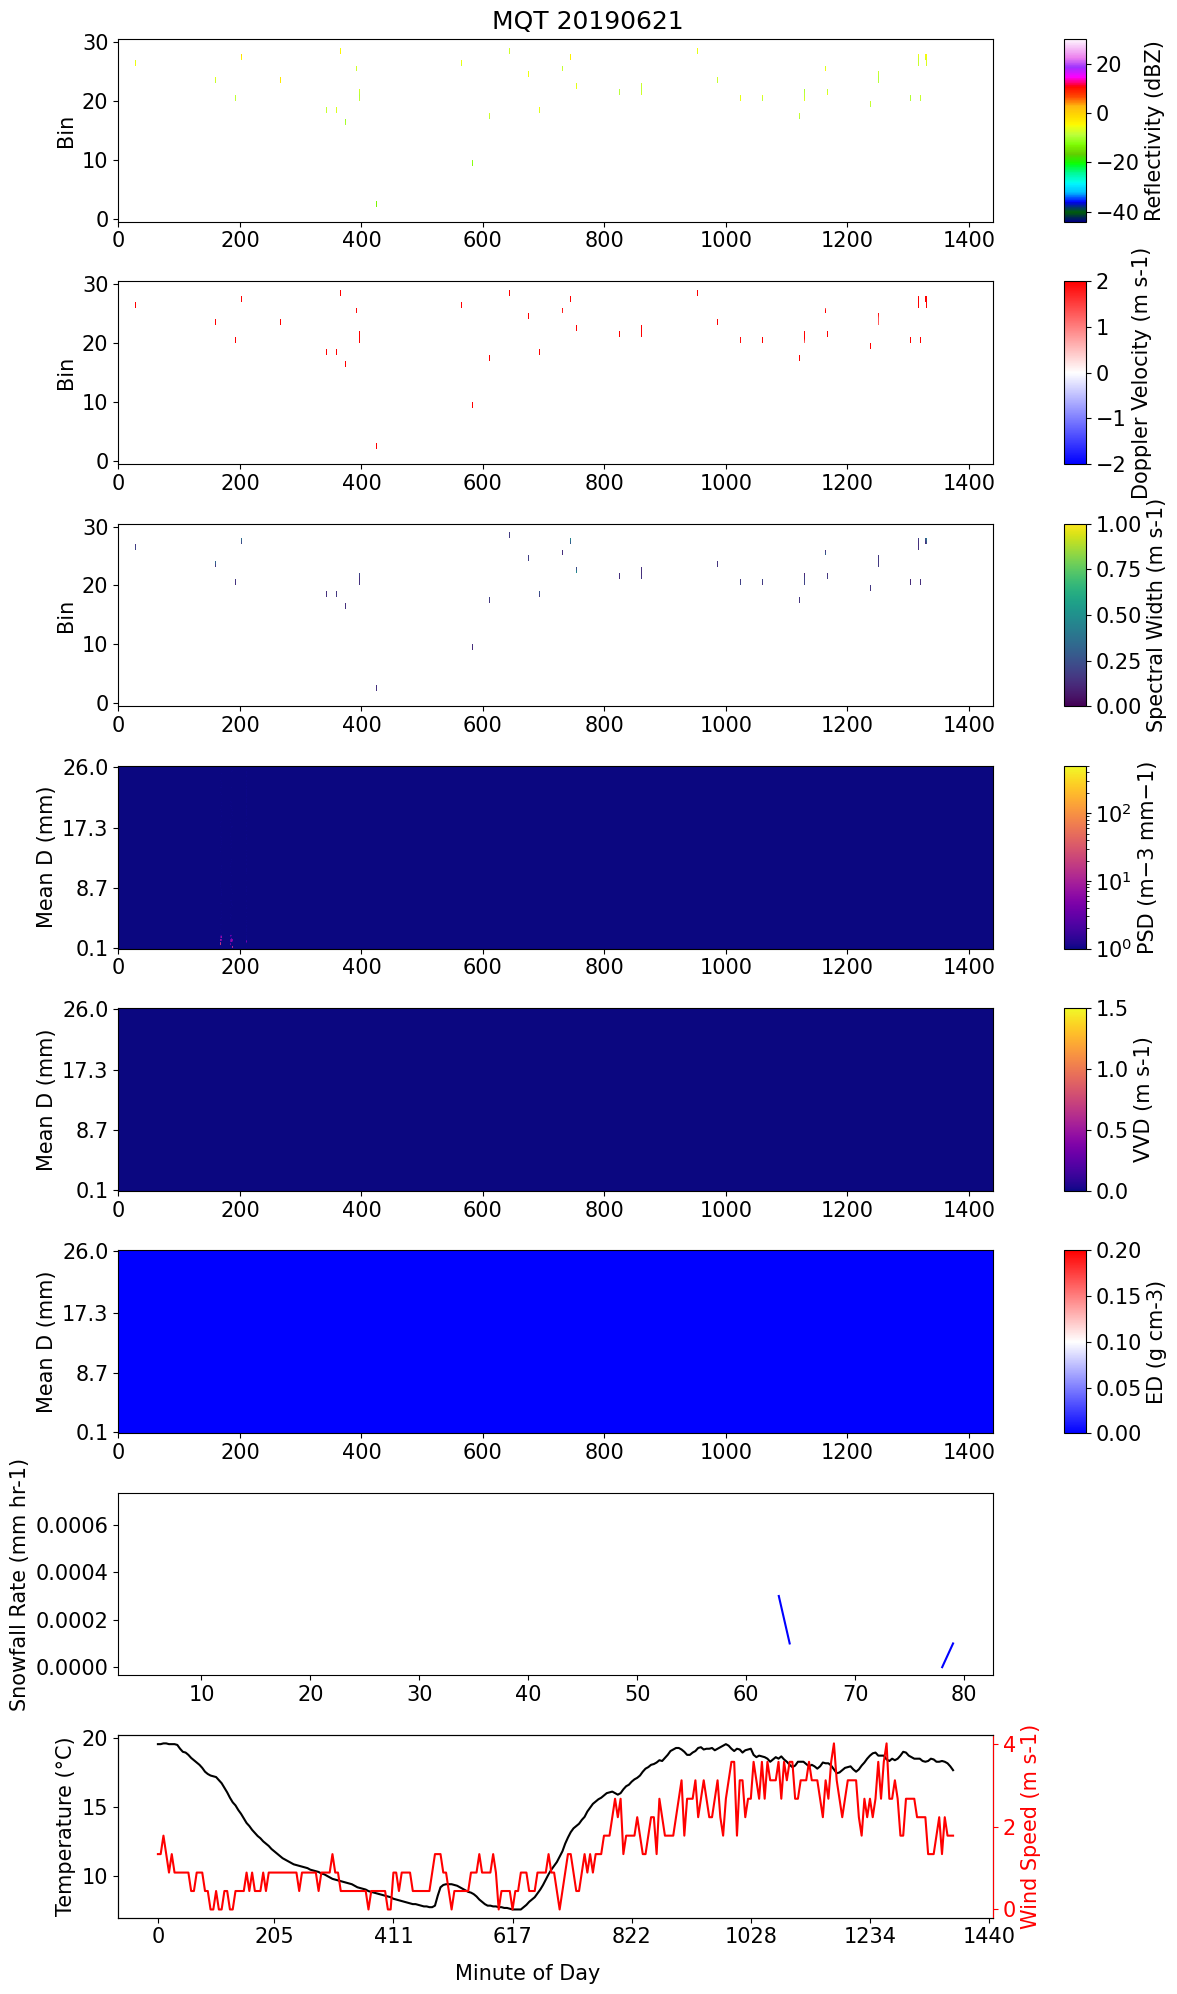

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

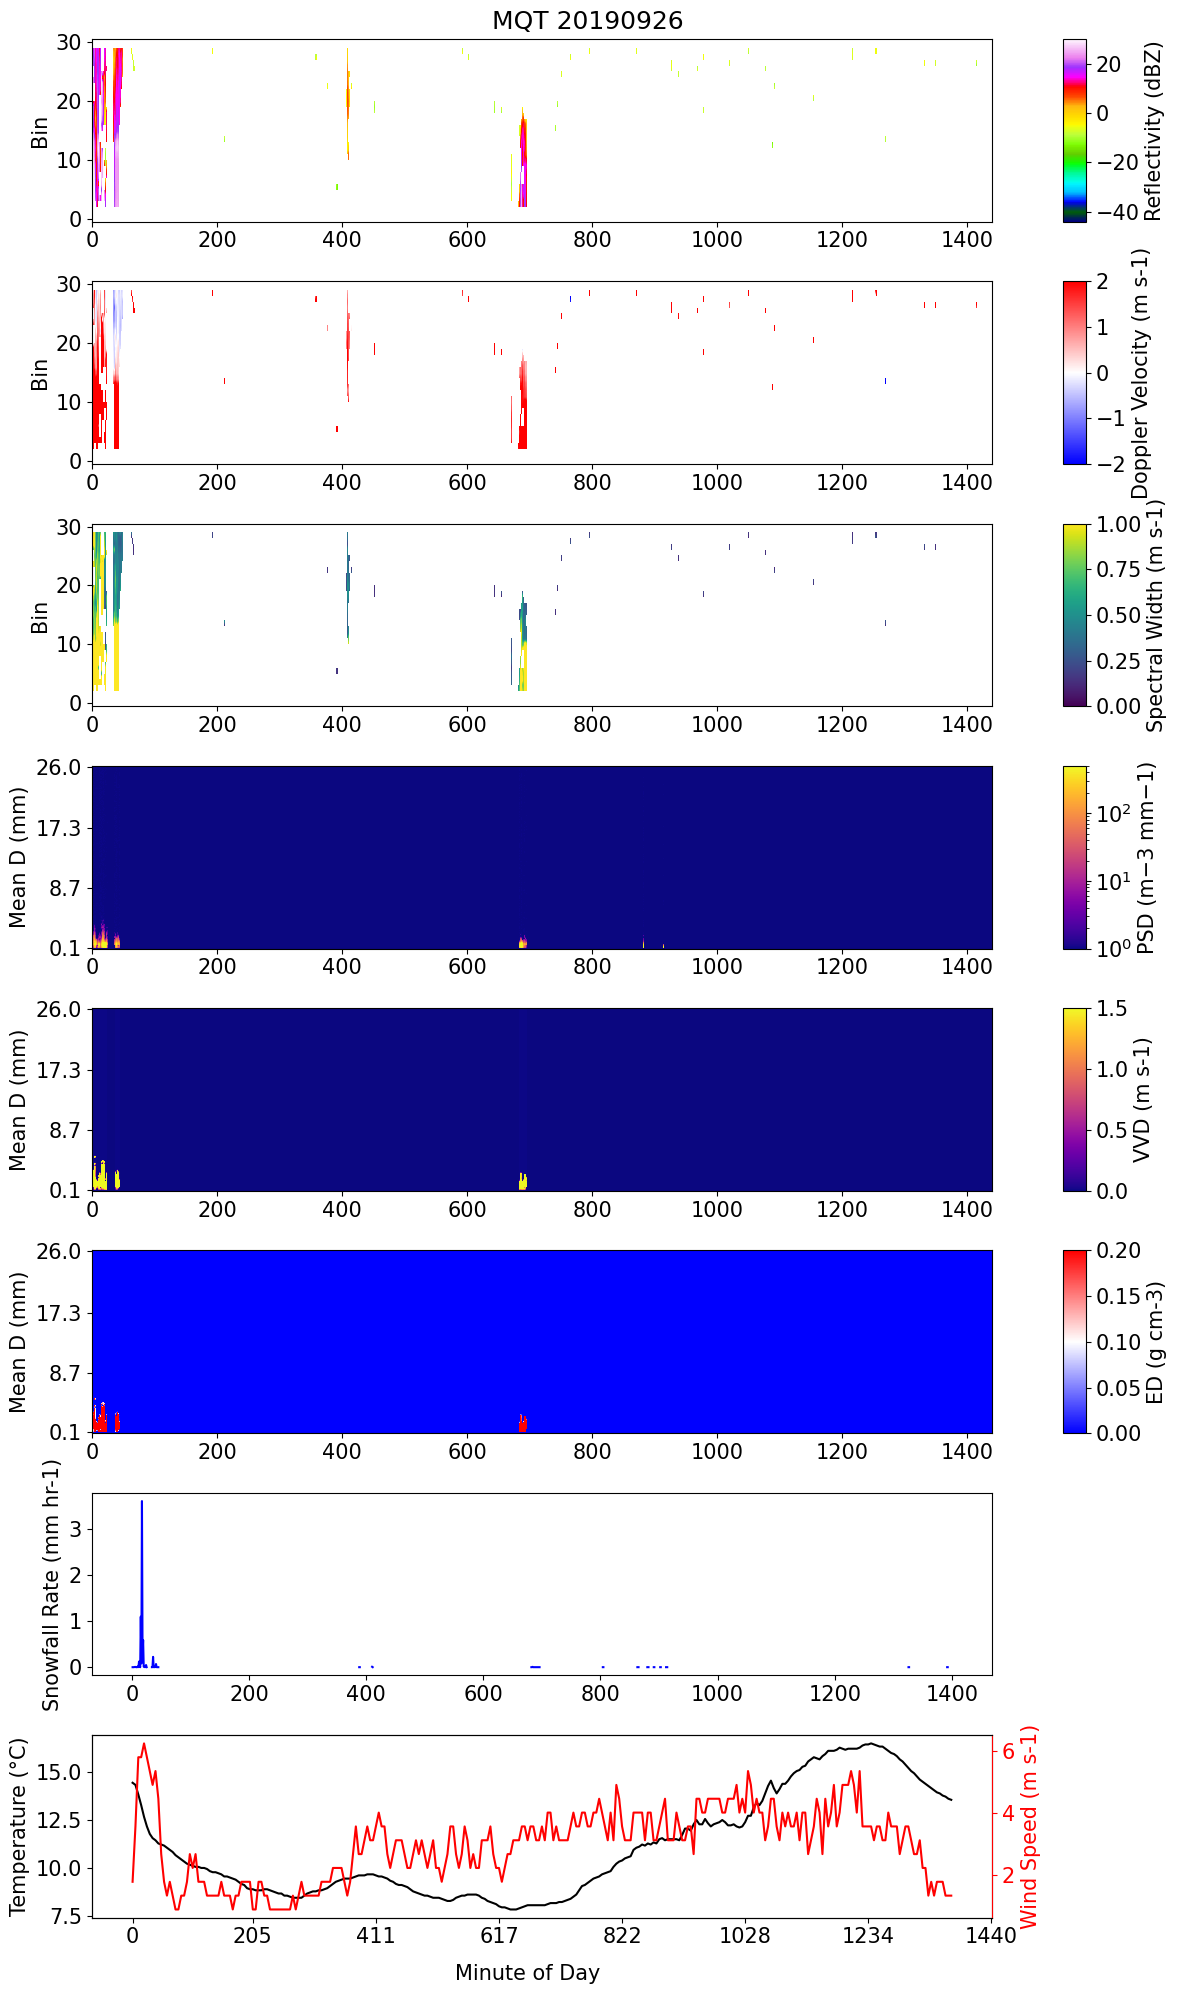

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

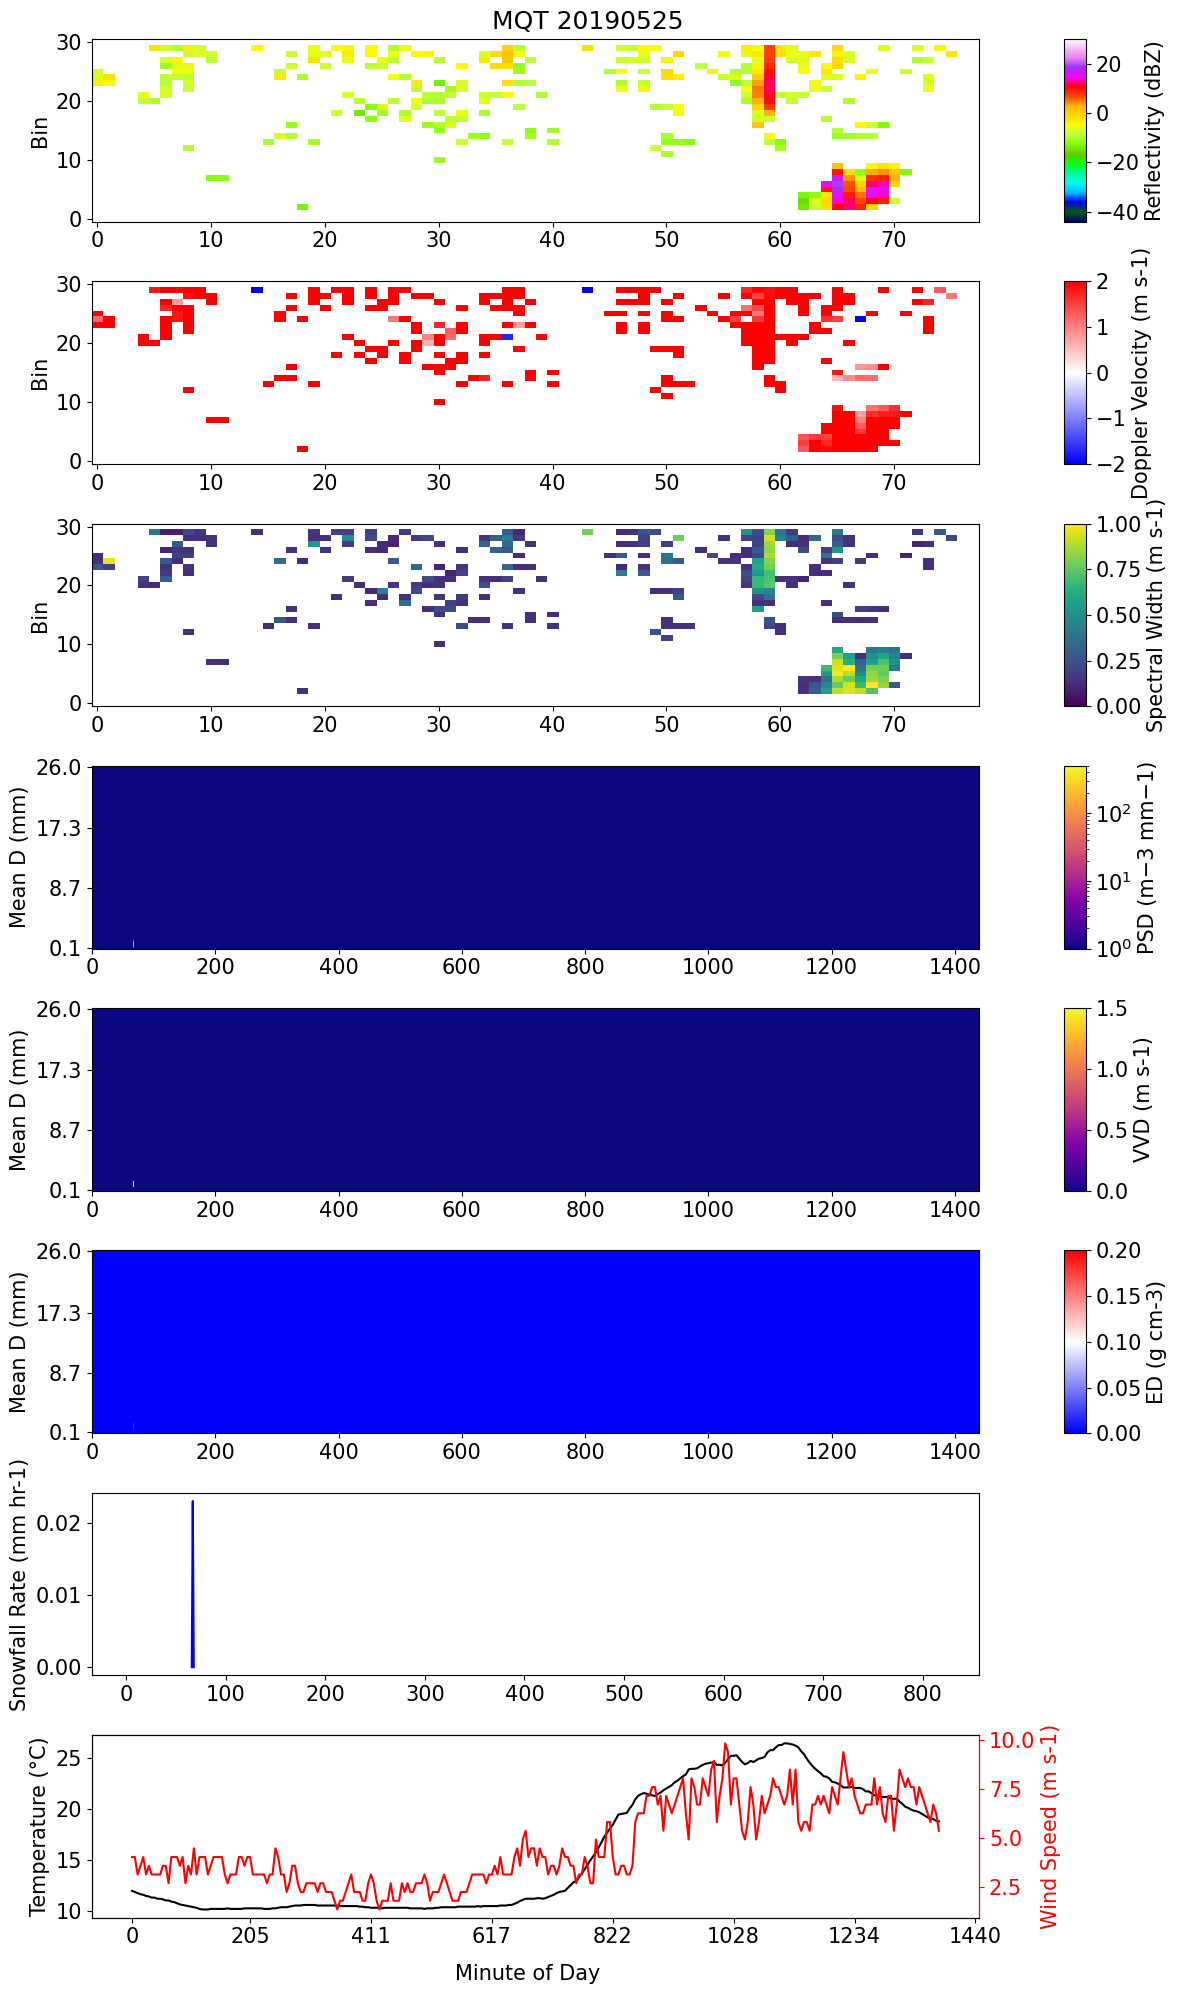

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

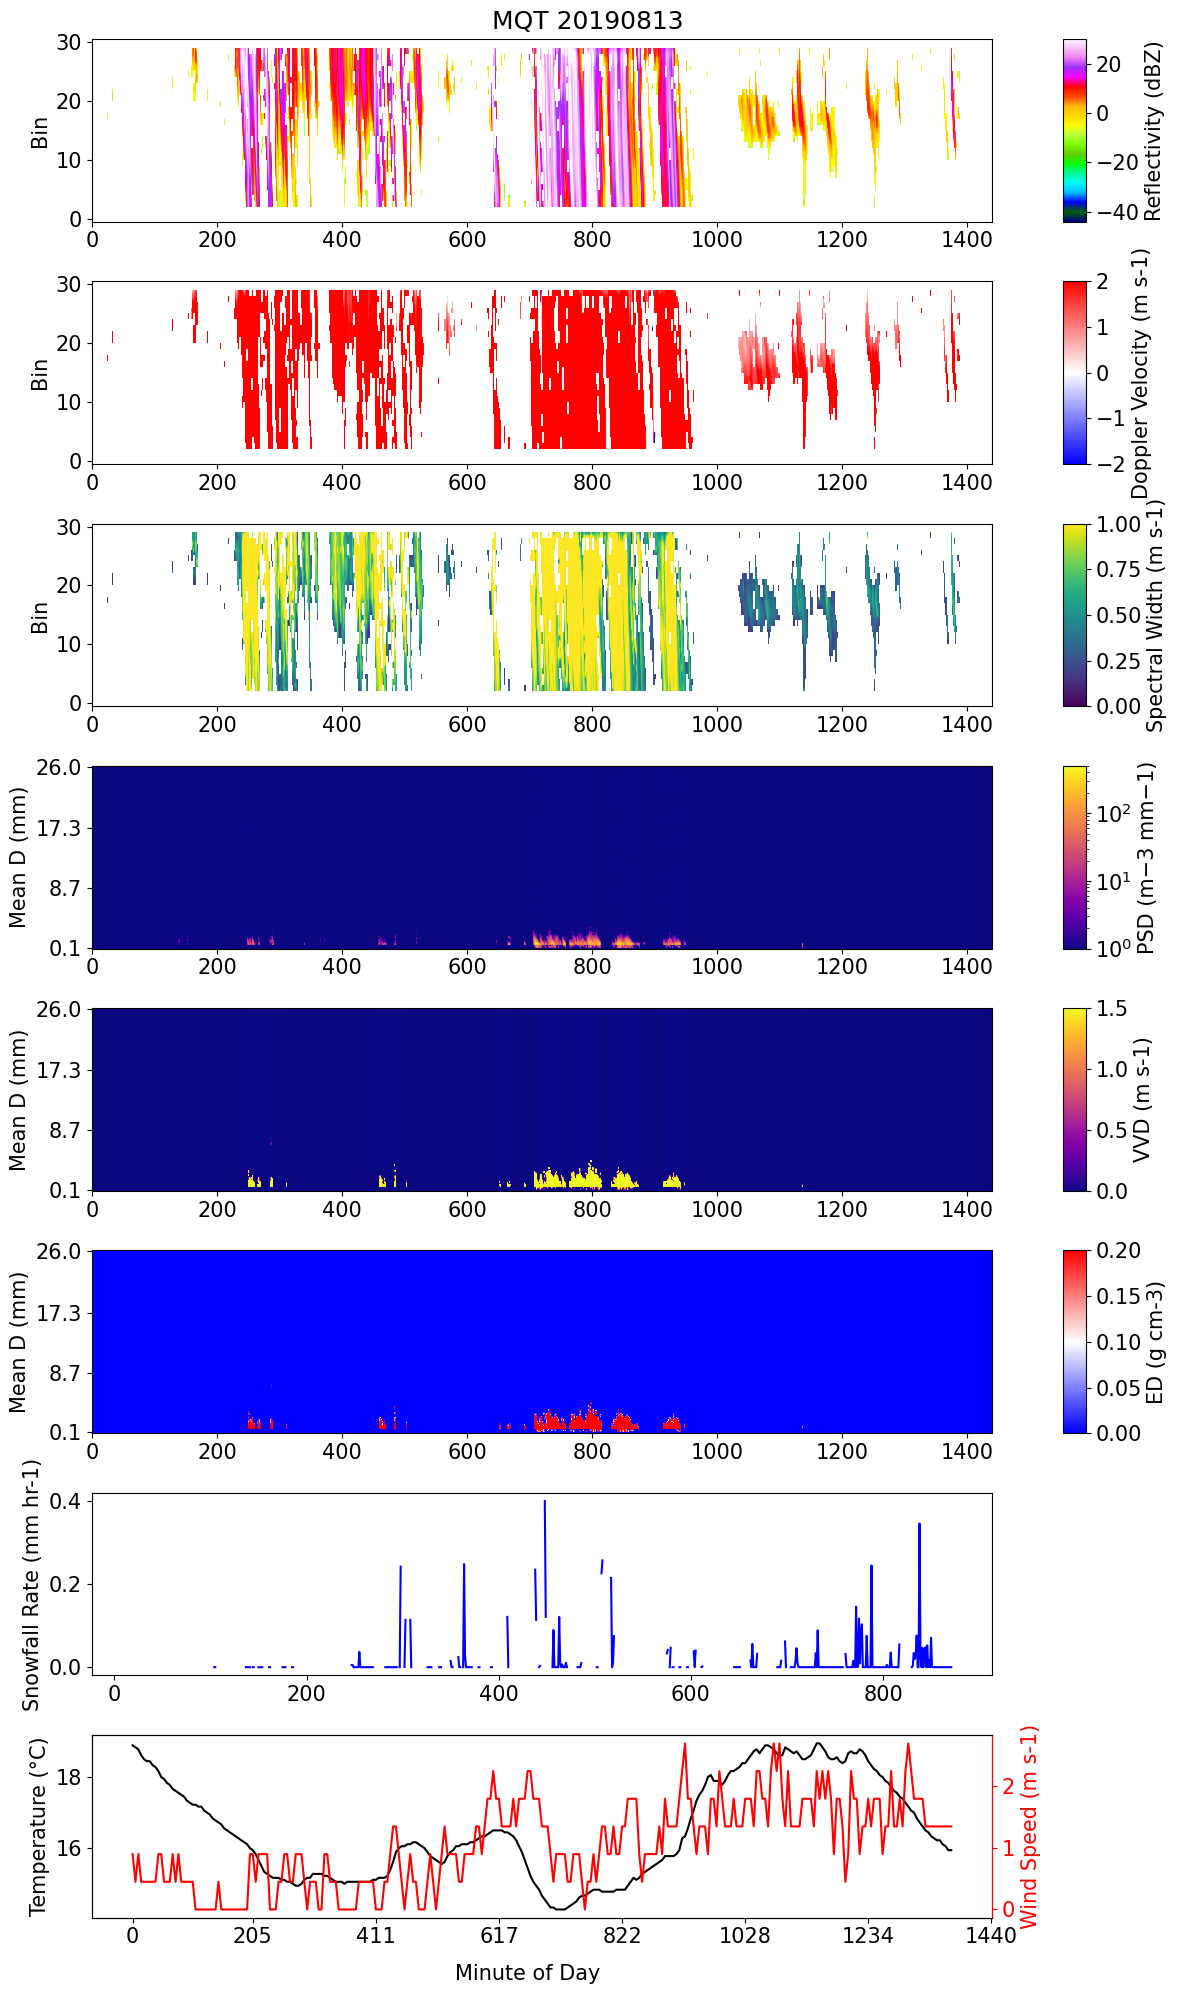

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

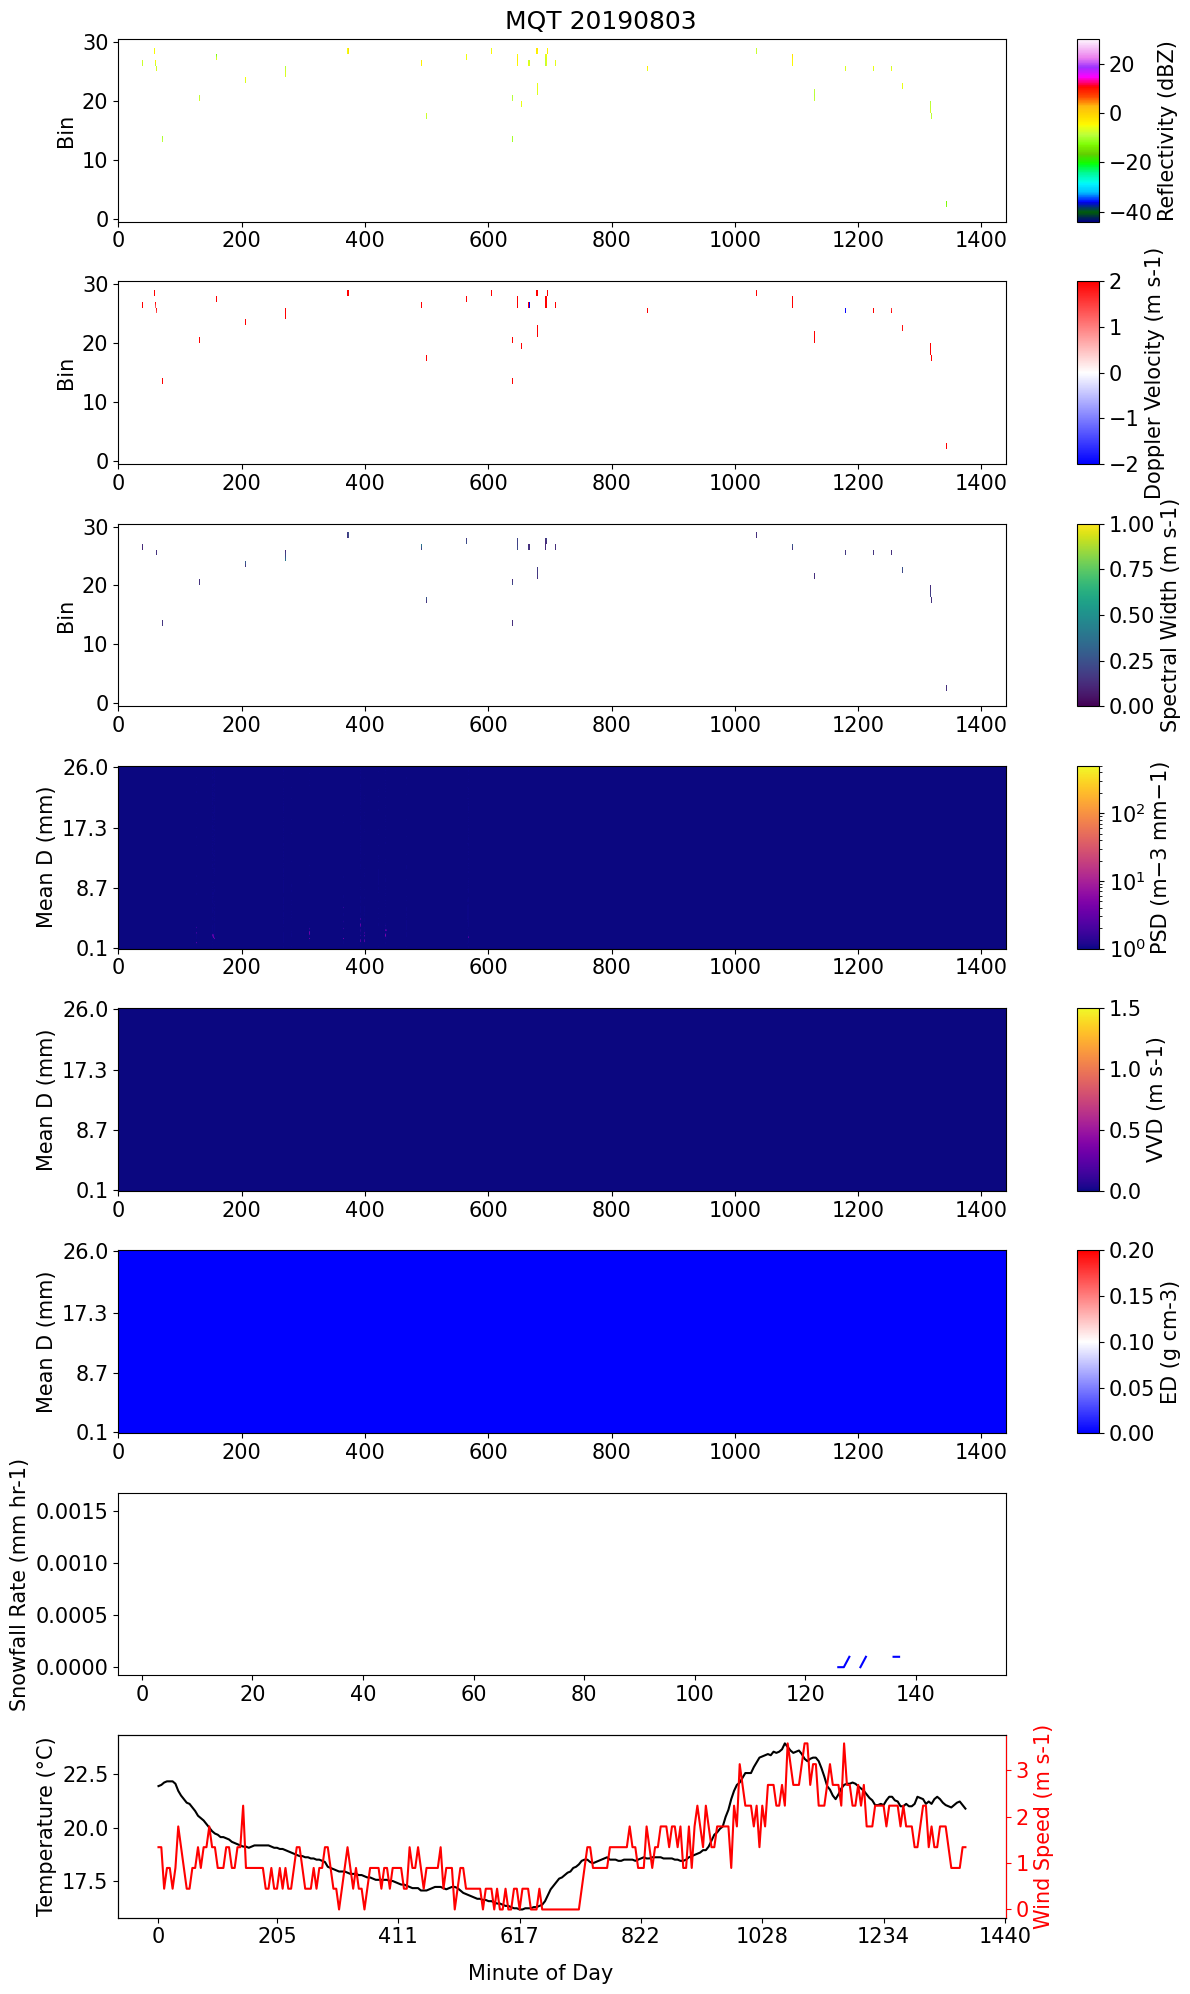

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

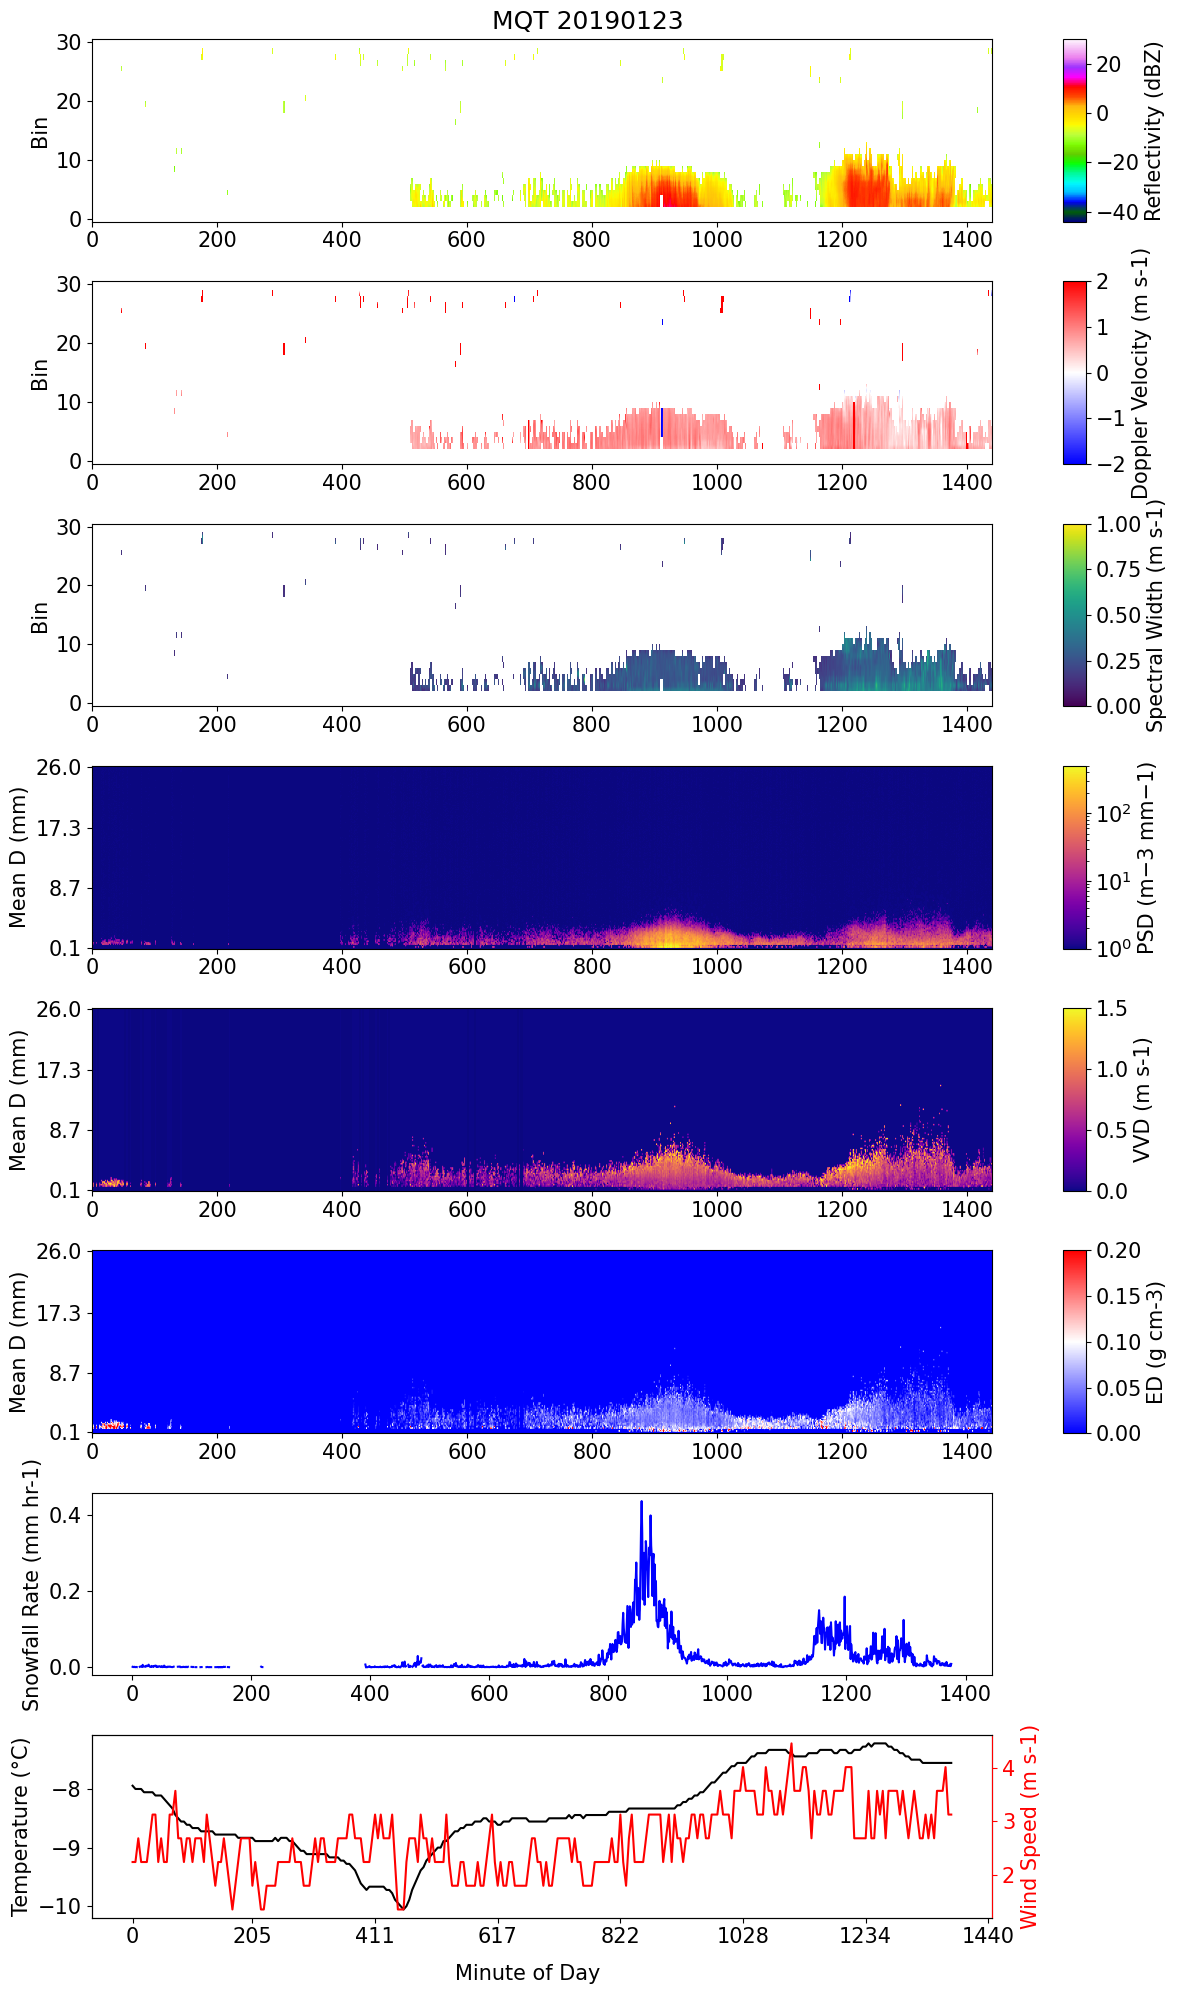

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

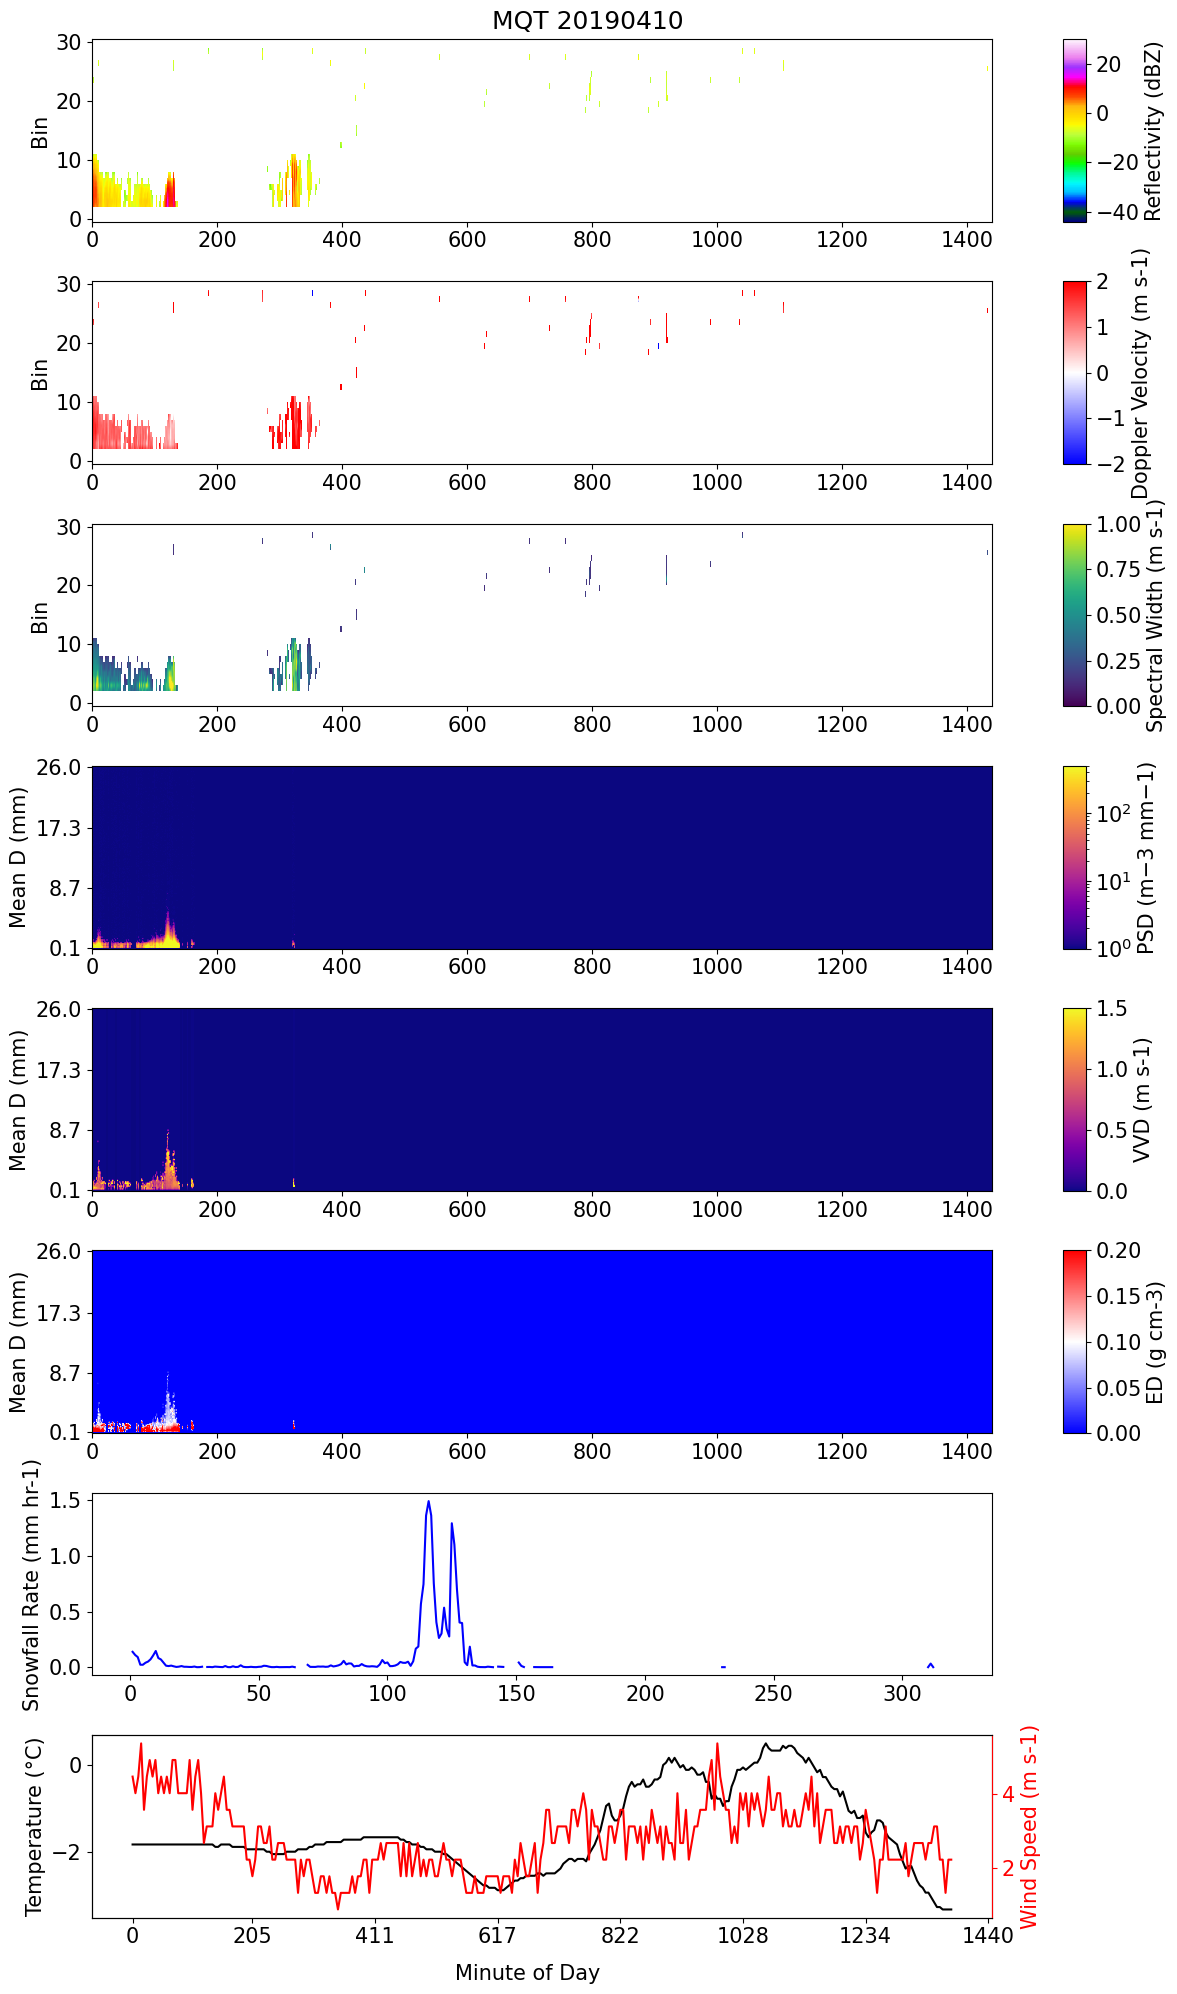

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

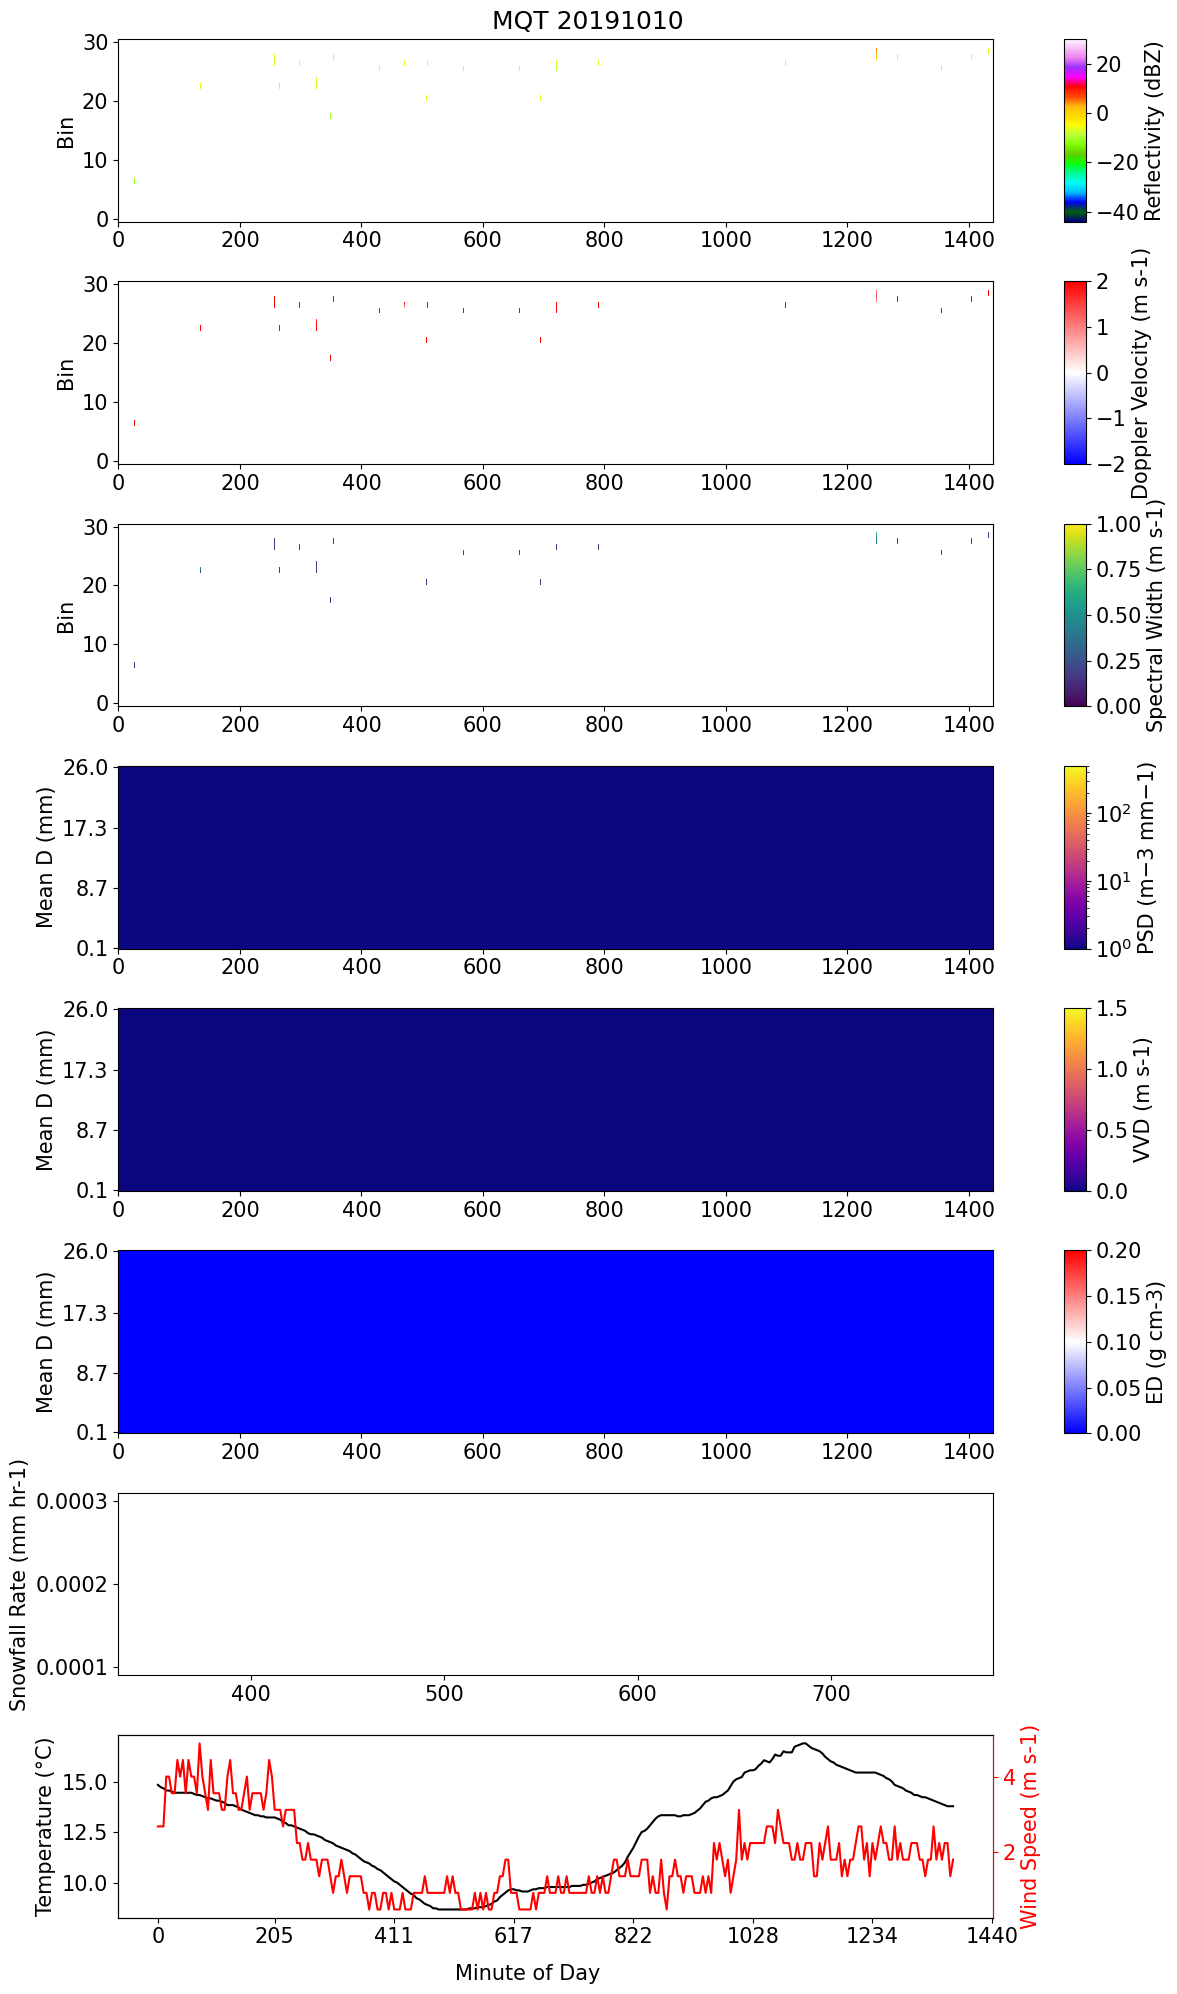

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

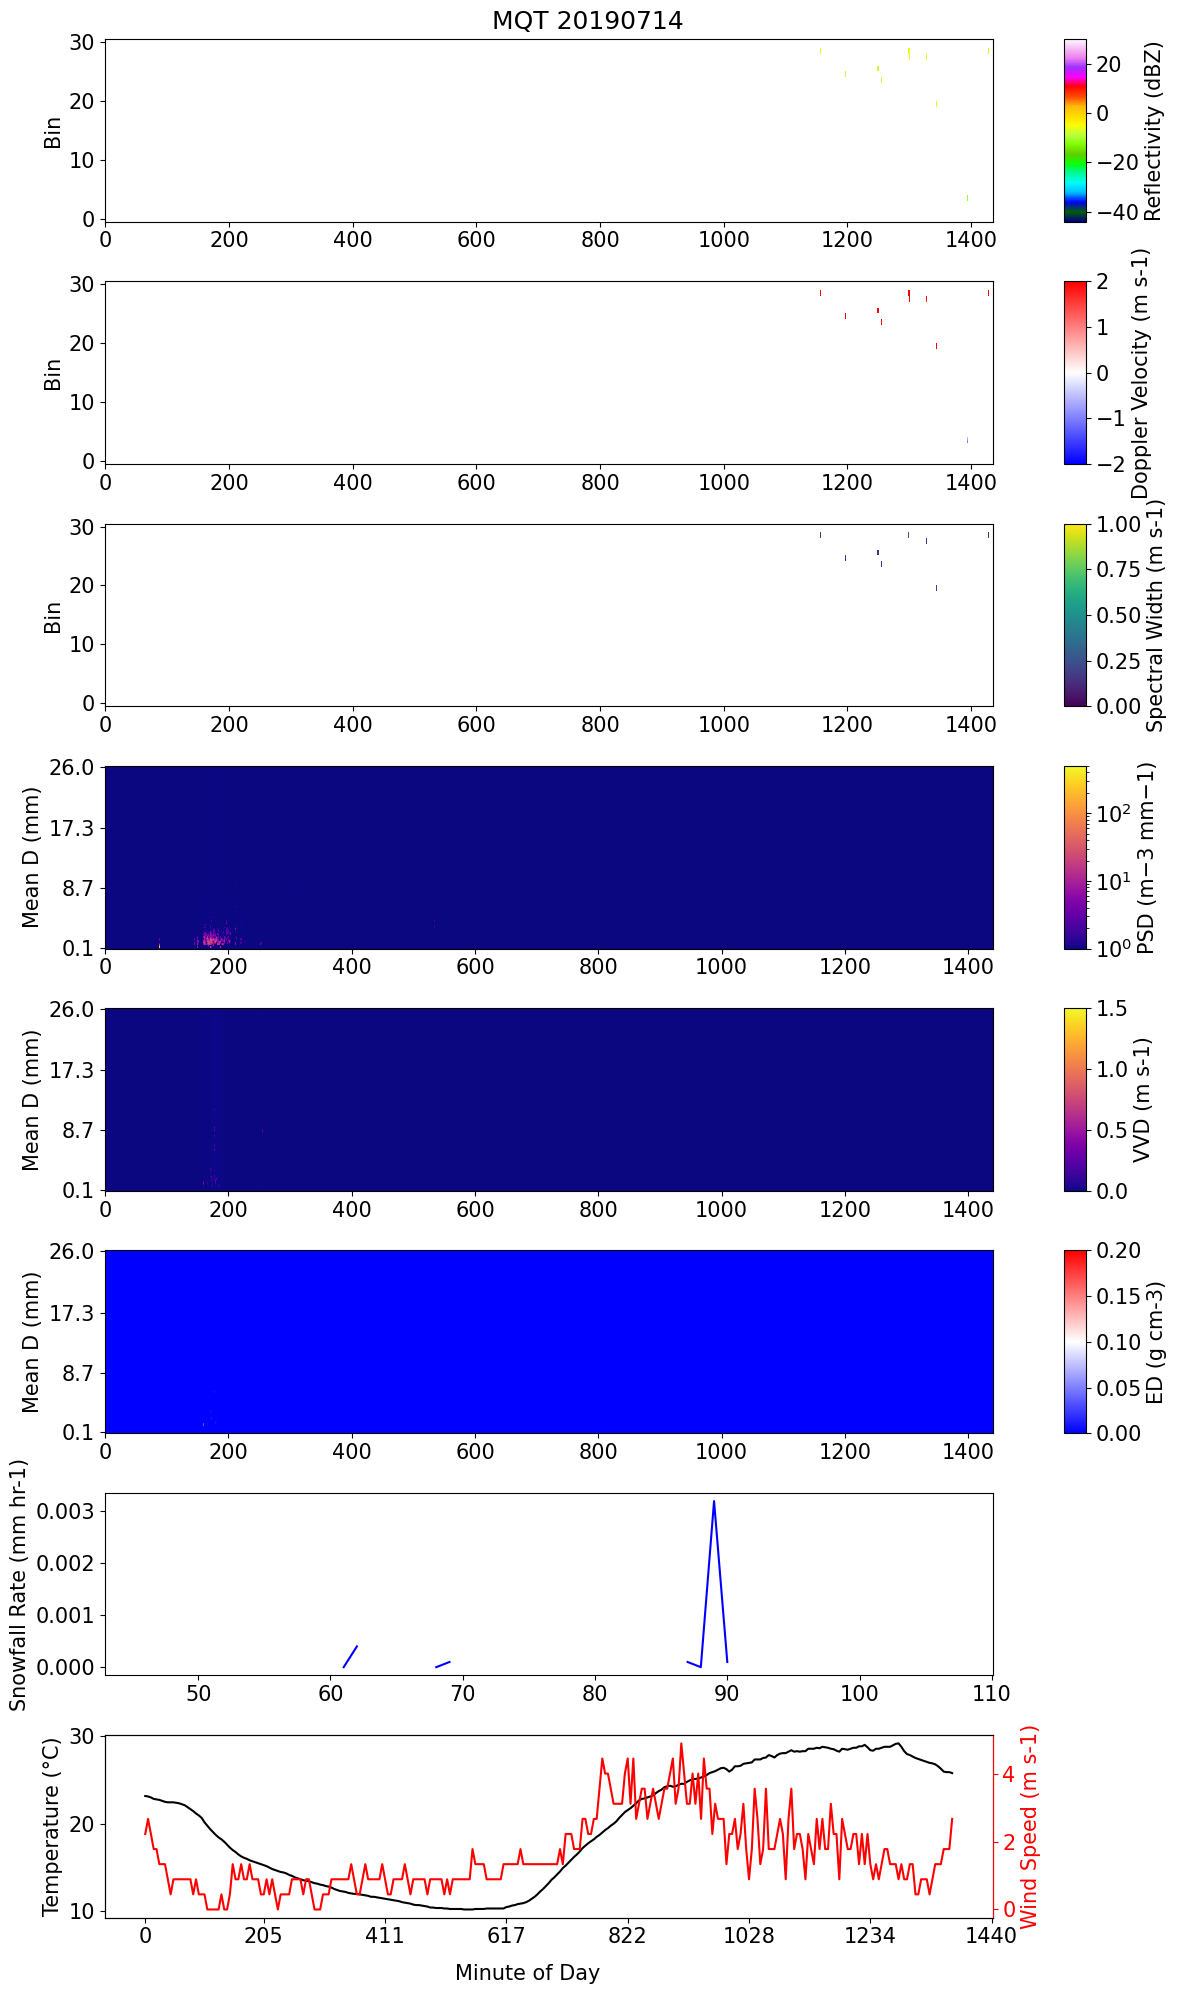

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

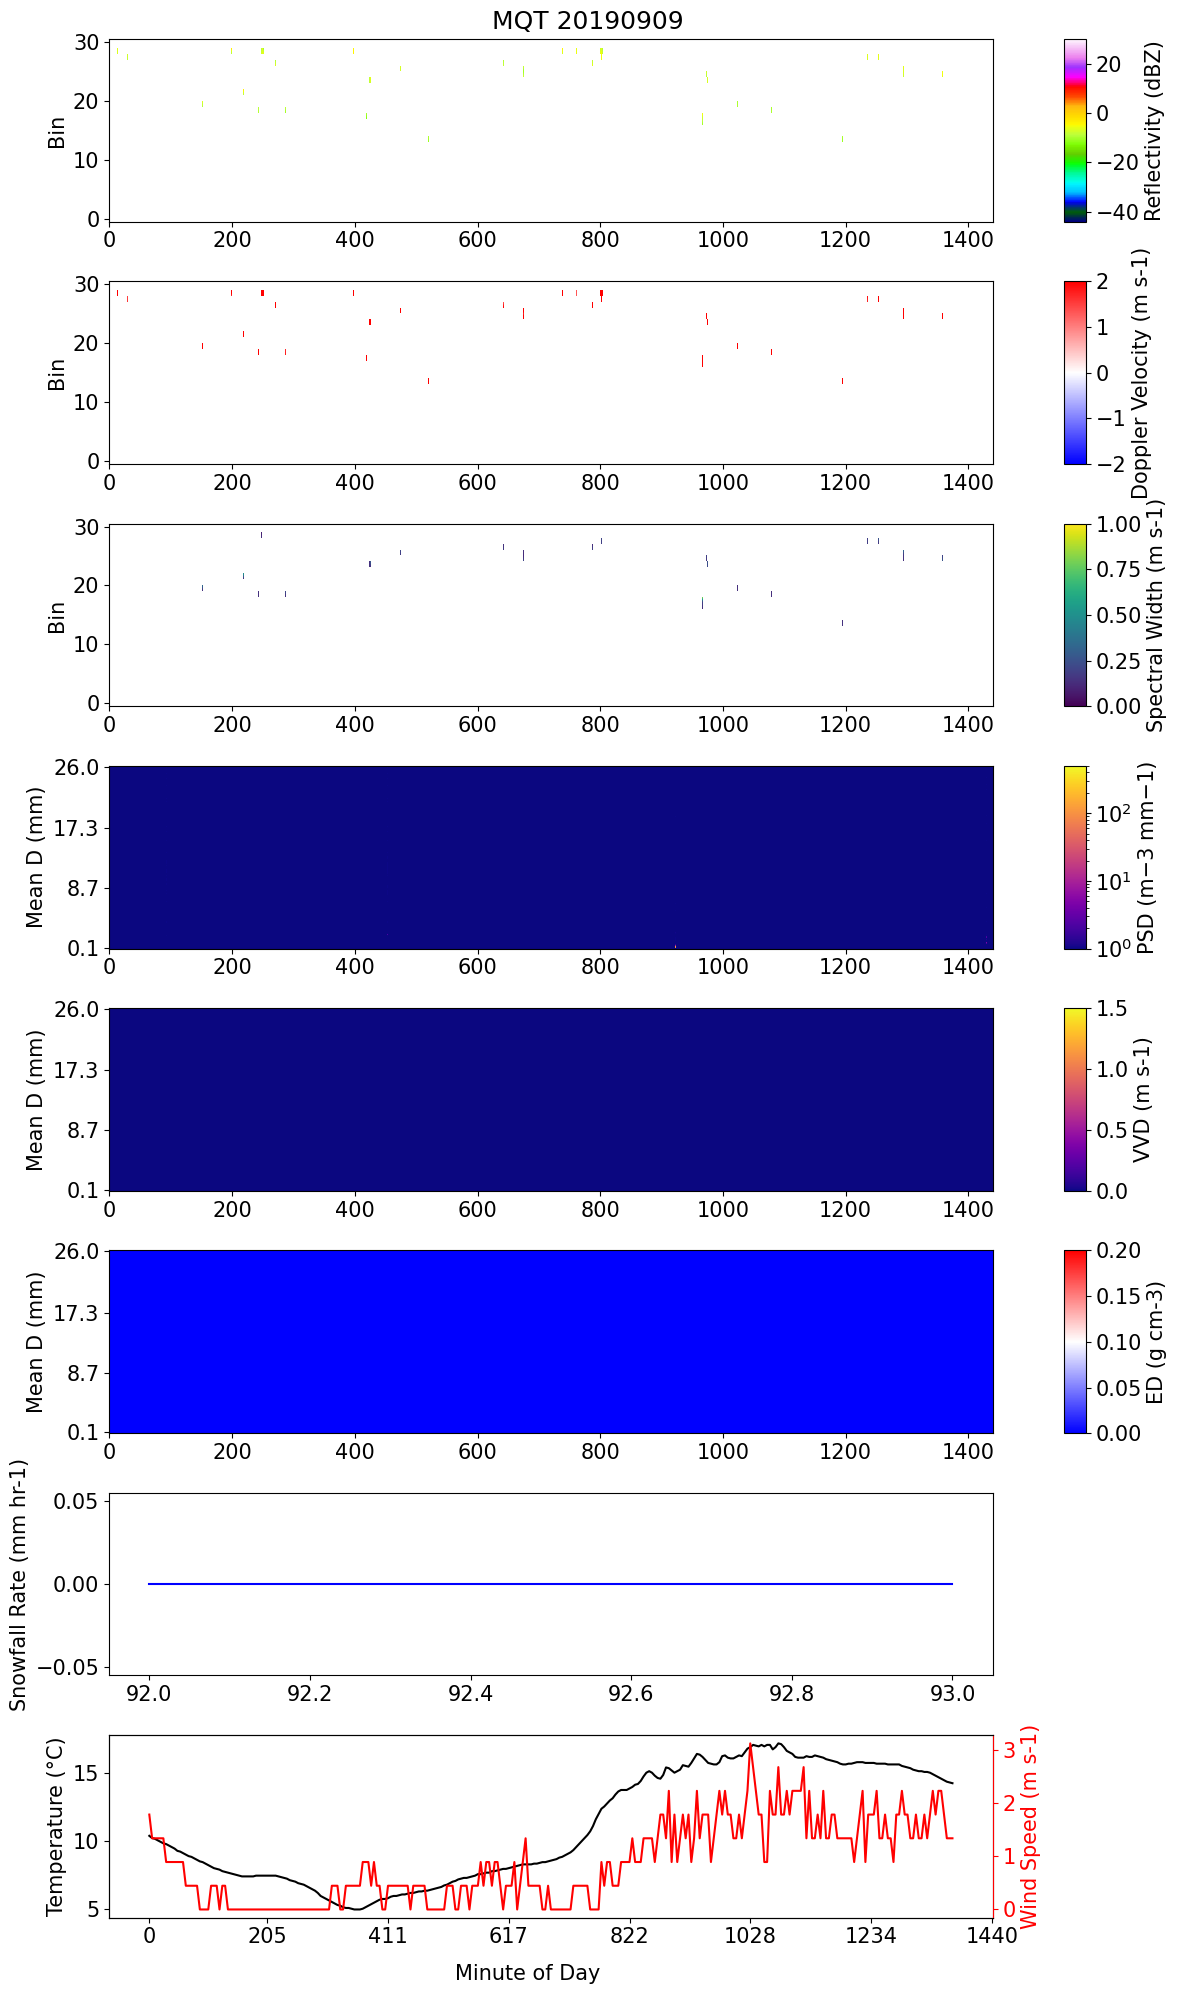

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

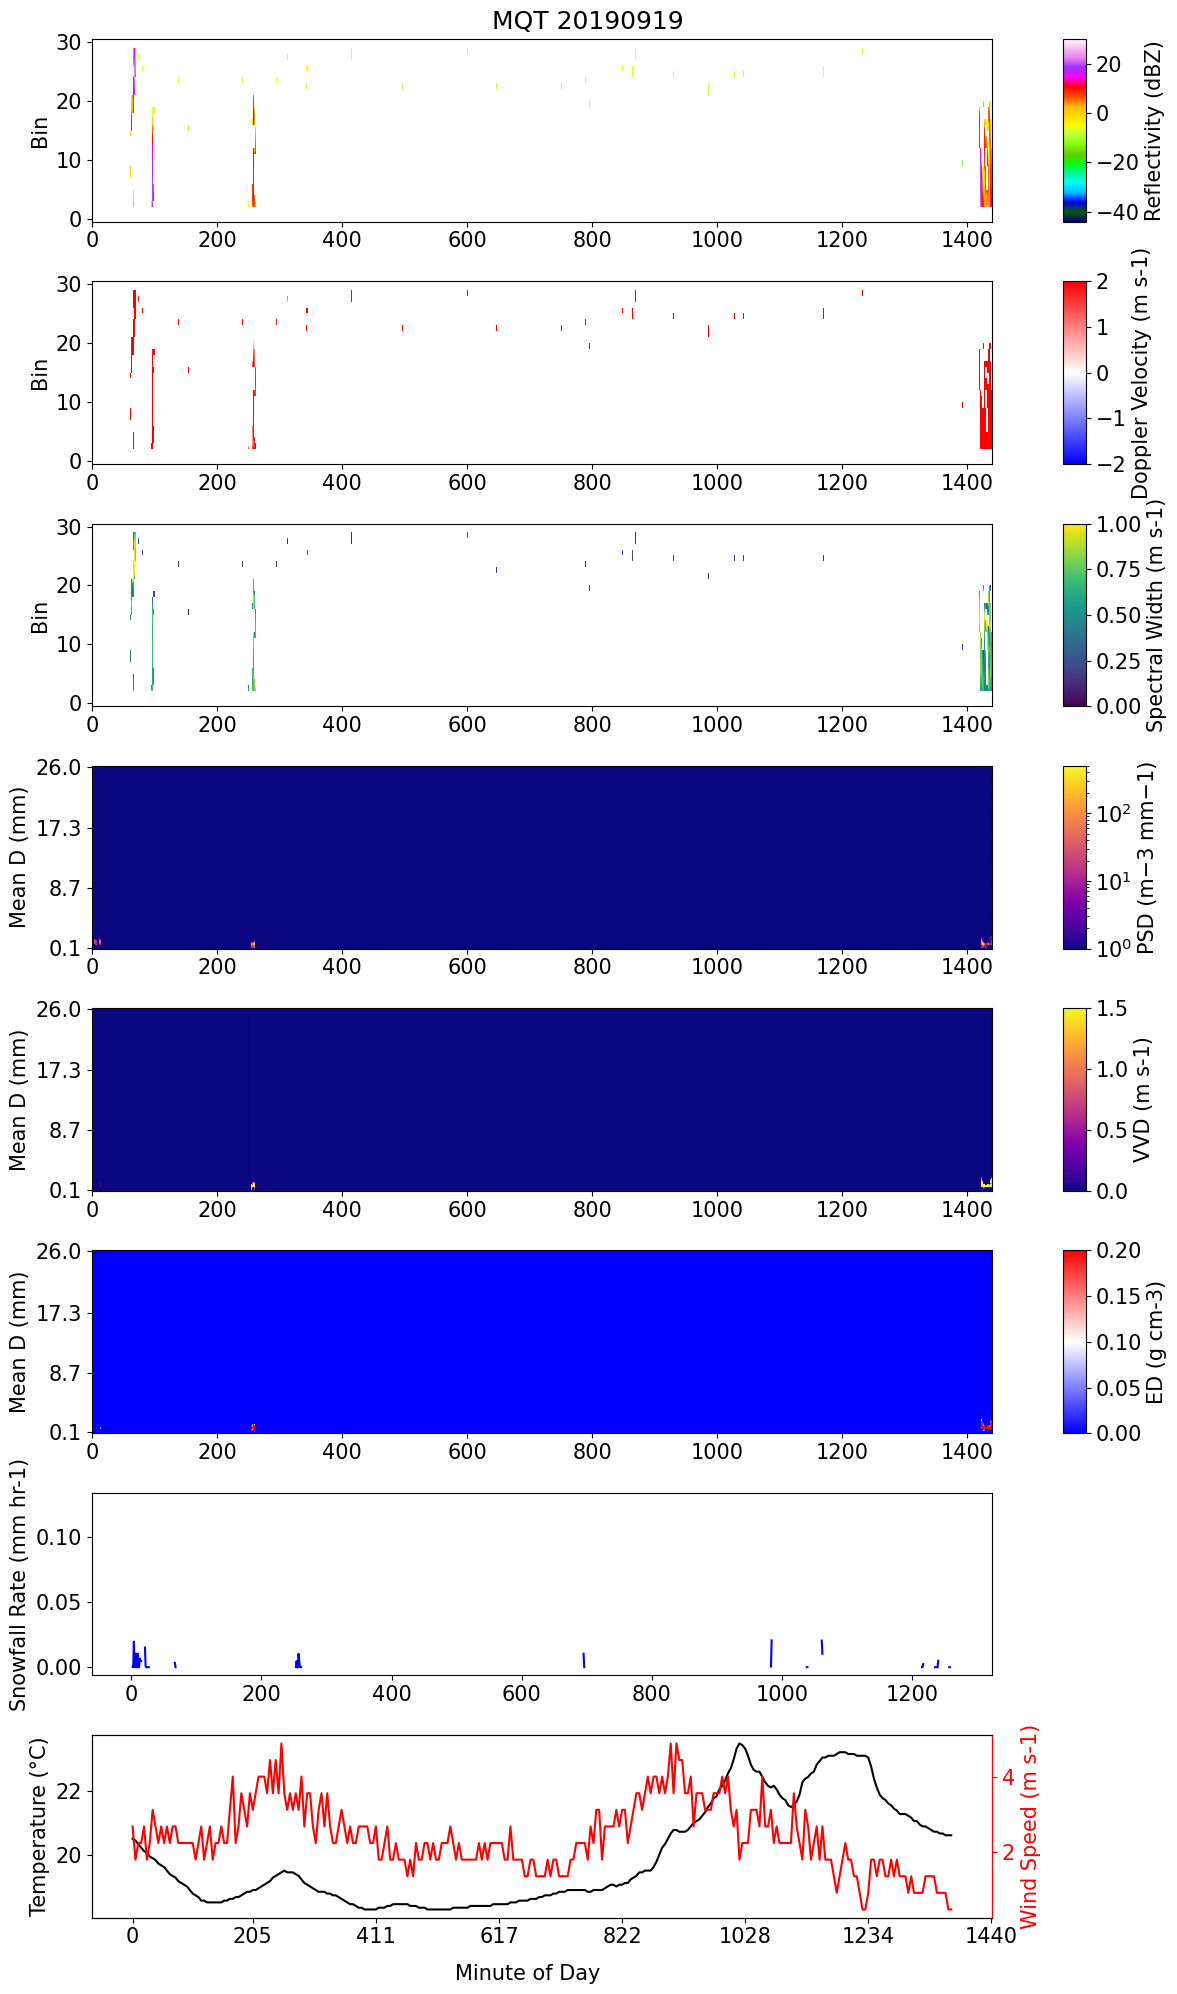

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

In [ ]:
################# MRR DATA

def plot_data_for_day(year, month, day):
    date = year + month + day
    ds_mrr = xr.open_dataset(mrr_path + 'MRR_NWS_' + SITE + '_' + date + '_snow.nc')
    
    ze = ds_mrr['Ze'].values
    dv = ds_mrr['W'].values
    sw = ds_mrr['spectralWidth'].values
    
    fig = plt.figure(figsize=(12,20))
    fig.suptitle(SITE + ' ' + date)
    gs = gridspec.GridSpec(8, 2, width_ratios=[1, 0.025]) 
    ax = plt.subplot(gs[0, 0])
    h = ax.imshow(ze.T, cmap='gist_ncar', vmin=-44, vmax=30, aspect='auto')
    cbar_ax = plt.subplot(gs[0, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Reflectivity (dBZ)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[1, 0])
    h = ax.imshow(dv.T, cmap='bwr', vmin=-2, vmax=2, aspect='auto')
    cbar_ax = plt.subplot(gs[1, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Doppler Velocity (m s-1)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[2, 0])
    h = ax.imshow(sw.T, cmap='viridis', vmin=0, vmax=1, aspect='auto')
    cbar_ax = plt.subplot(gs[2, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Spectral Width (m s-1)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[3, 0])
    ax.patch.set_facecolor('#0b0780')
    ds_pip = xr.open_dataset(pip_path + '/particle_size_distributions/006' + date + '2350_01_dsd.nc')   
    cbar_ax = plt.subplot(gs[3, 1])
    val = ds_pip['psd'].values
    h = ax.imshow(val.T, cmap='plasma', norm=LogNorm(vmin=1, vmax=500), aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('PSD (m−3 mm−1)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 1, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[4, 0])
    ax.patch.set_facecolor('#0b0780')
    ds_pip = xr.open_dataset(pip_path + '/velocity_distributions/006' + date + '2350_01_vvd_A.nc')
    cbar_ax = plt.subplot(gs[4, 1])   
    val = ds_pip['vvd'].values
    h = ax.imshow(val.T, cmap='plasma', vmin=0, vmax=1.5, aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('VVD (m s-1)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 1, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[5, 0])
    ax.patch.set_facecolor('blue')
    ds_pip = xr.open_dataset(pip_path + '/edensity_distributions/006' + date + '2350_01_rho_Plots_D_minute.nc')   
    cbar_ax = plt.subplot(gs[5, 1])
    val = ds_pip['rho'].values
    h = ax.imshow(val.T, cmap='bwr', vmin=0, vmax=0.2, aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('ED (g cm-3)')
    bin_centers = ds_pip.bin_centers.values
    ticks_idx = np.linspace(0, len(bin_centers) - 1, 4, dtype=int)
    ax.set_yticks(ticks_idx)
    ax.set_yticklabels(bin_centers[ticks_idx])
    ax.set_ylabel('Mean D (mm)')
    ax.invert_yaxis()
    
    
    ax = plt.subplot(gs[6, 0])
    ds_lwe = xr.open_dataset(pip_path + '/edensity_lwe_rate/006' + date + '2350_01_P_Minute.nc')    
    val = ds_lwe['nrr'].values
    ax.plot(np.arange(len(val)), val, color='blue')
    ax.set_ylabel('Snowfall Rate (mm hr-1)')
    
    ax = plt.subplot(gs[7, 0])
    ds_met = xr.open_dataset(met_path + '2013-2020_' + SITE + '.nc')
    times = np.asarray((ds_met['UTC Time'].values / 1000000000), dtype=int)
    utc_time = pd.to_datetime(times, unit='s', origin='unix')
    ds_met = ds_met.assign_coords(time = utc_time)
    ds_met = ds_met.sel(time=(ds_met['time.year']==int(year)) & (ds_met['time.month']==int(month)) & (ds_met['time.day']==int(day)))
    
    t = ds_met['Temp Out'].values  
    p = ds_met['Wind Speed'].values     
    ax.plot(np.arange(len(t)), t, color='black')
    ax.set_ylabel('Temperature (°C)')
    
    x_ticks = np.linspace(0, 300, 8, dtype=int)
    x_labels = np.linspace(0, 1440, 8, dtype=int)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    
    ax2 = ax.twinx()
    ax2.plot(np.arange(len(p)), p, color='red')
    ax2.set_ylabel('Wind Speed (m s-1)')
    ax2.spines['right'].set_color('red')
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red')
    
    fig.text(0.45, -0.005, 'Minute of Day', ha='center')
    
    plt.tight_layout()
    plt.show()

    
for date in matched_dates:
    year = date[:4]
    month = date[4:6]
    day = date[-2:]
    plot_data_for_day(year, month, day)
